# 문제 1
- https://leetcode.com/contest/weekly-contest-323/problems/delete-greatest-value-in-each-row/

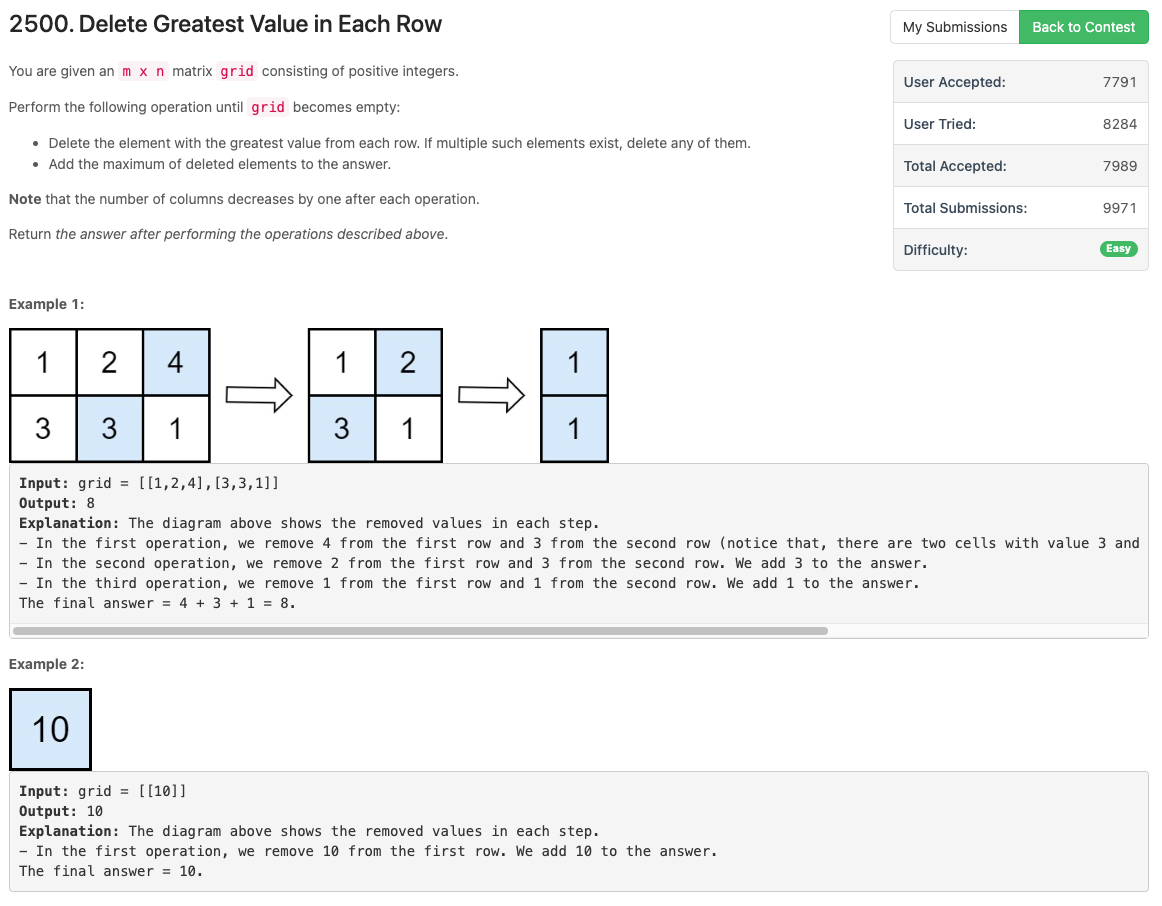

In [2]:
class Solution:
    def deleteGreatestValue(self, grid: List[List[int]]) -> int:
        m = len(grid)
        n = len(grid[0])
        for i in range(m):
            grid[i] = sorted(grid[i], reverse=True)
        
        answer = 0
        for i in range(n):
            answer += max(list(map(max,grid)))
            for i in range(m):
                grid[i].pop(0)
            
        return answer

1

# 문제 2
- https://leetcode.com/contest/weekly-contest-323/problems/longest-square-streak-in-an-array/

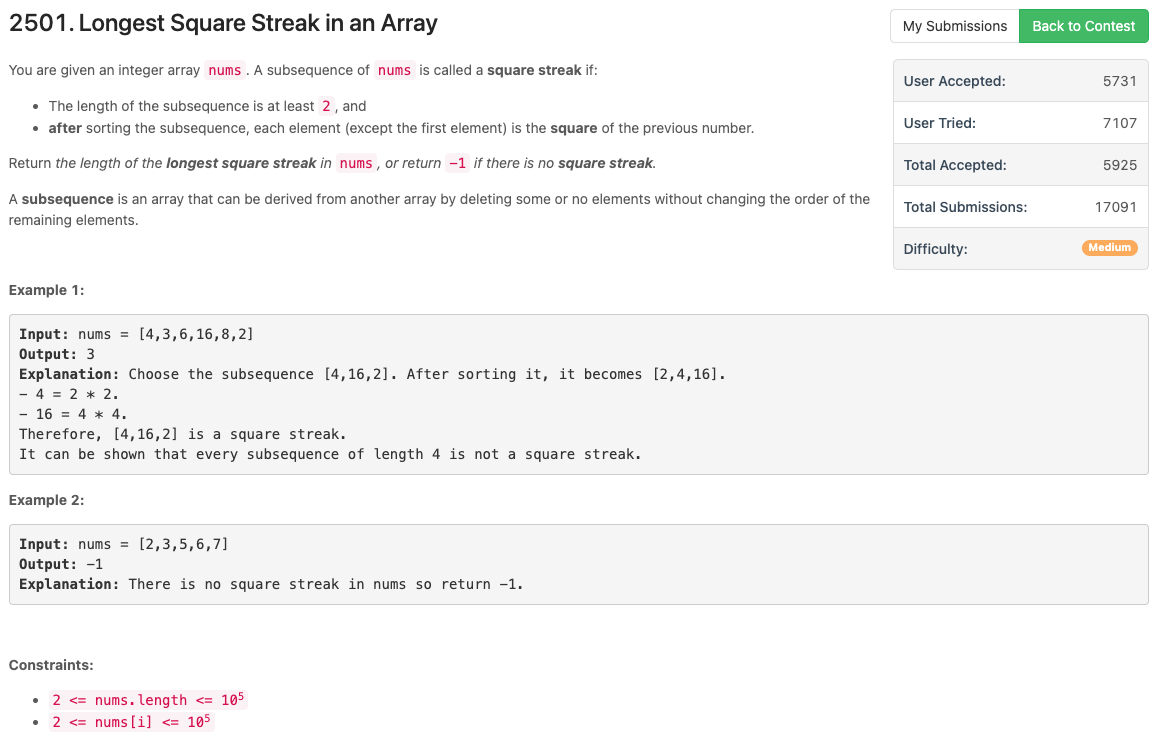

In [63]:
class Solution:
    def longestSquareStreak(self, nums: List[int]) -> int:
        square = {}
        nums.sort(reverse = True)
        res = -1
        for num in nums:
            if num * num in square:
                square[num] = square[num * num] + 1
                res = max(res, square[num])
            else:
                square[num] = 1
        return res

In [66]:
nums=[4,3,6,16,8,2]
square = {}
nums.sort(reverse = True)
res = -1
for num in nums:
    if num * num in square:
        square[num] = square[num * num] + 1
        res = max(res, square[num])
    else:
        square[num] = 1

In [67]:
square

{16: 1, 8: 1, 6: 1, 4: 2, 3: 1, 2: 3}

# 문제 3
- https://leetcode.com/contest/weekly-contest-323/problems/design-memory-allocator/

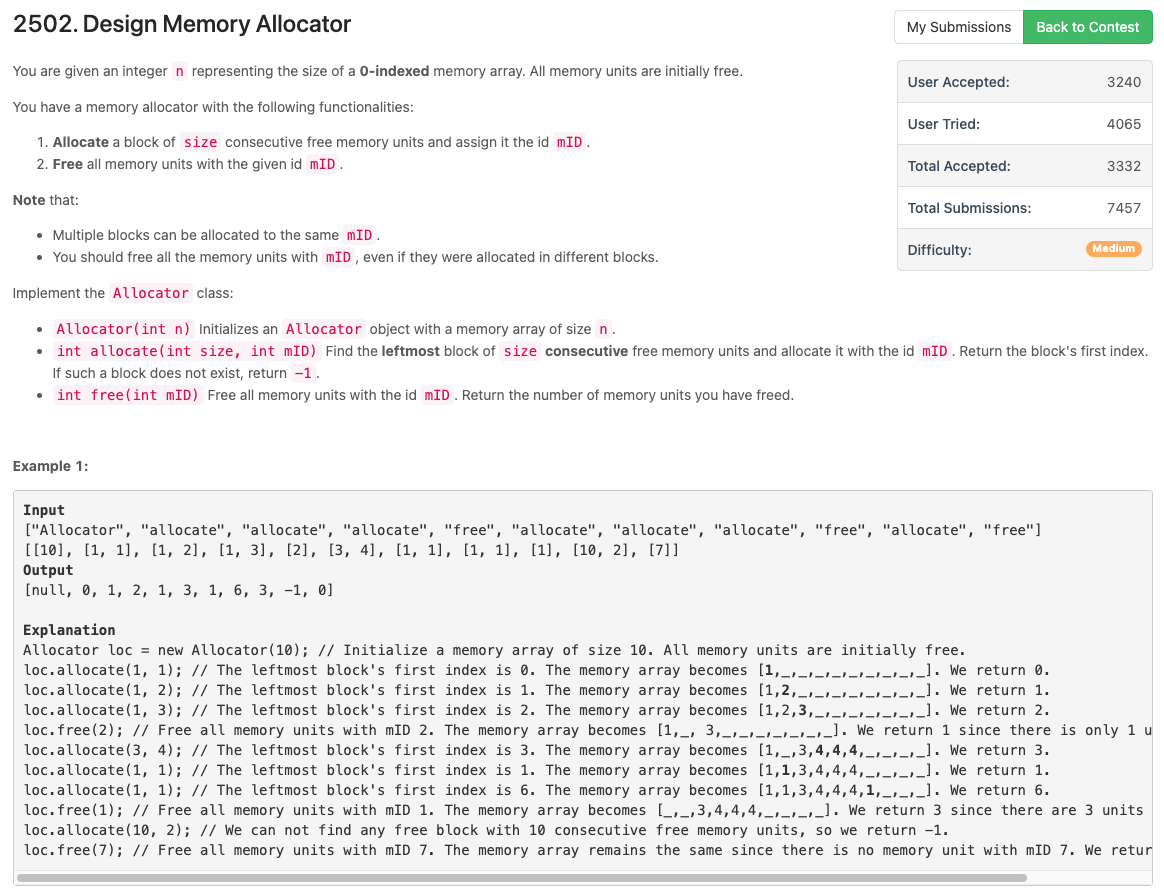
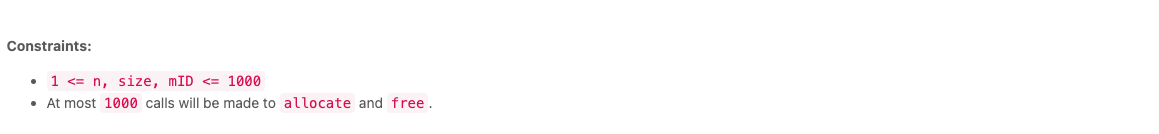

- 문제 이해 부족..

In [ ]:
class Allocator:

    def __init__(self, n: int):
        self.arr=[0 for i in range(n)]
        self.n=n

    def allocate(self, size: int, mID: int) -> int:
        index=-1
        t=0
        for i in range(self.n-1,-1,-1):
            if(self.arr[i]==0):
                t+=1
                if(t>=size):
                    index=i
            else:
                t=0
        if(index==-1):
            return index
        for i in range(index,index+size):
            self.arr[i]=mID
        return index
    def free(self, mID: int) -> int:
        t=0
        for i in range(self.n):
            if(self.arr[i]==mID):
                self.arr[i]=0
                t+=1
        return t


# Your Allocator object will be instantiated and called as such:
# obj = Allocator(n)
# param_1 = obj.allocate(size,mID)
# param_2 = obj.free(mID)

# 문제 4
- https://leetcode.com/contest/weekly-contest-323/problems/maximum-number-of-points-from-grid-queries/

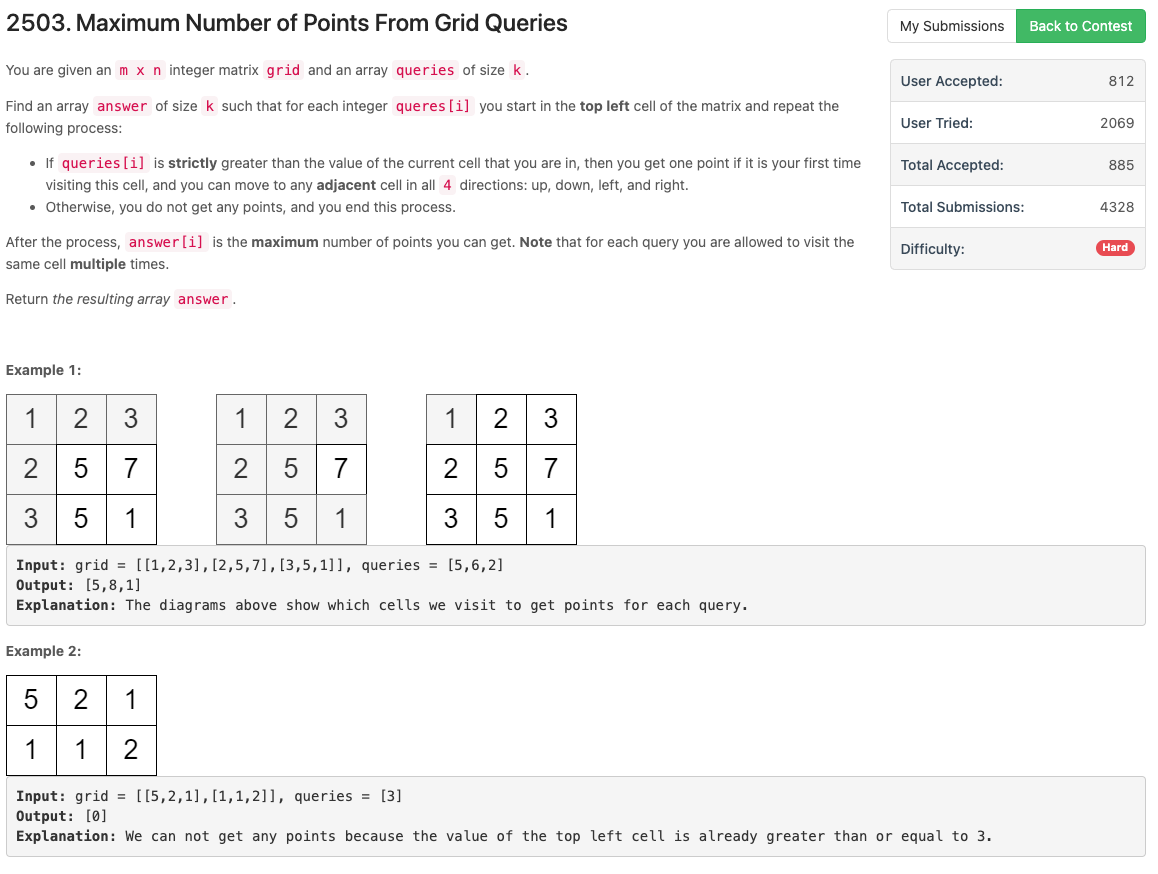
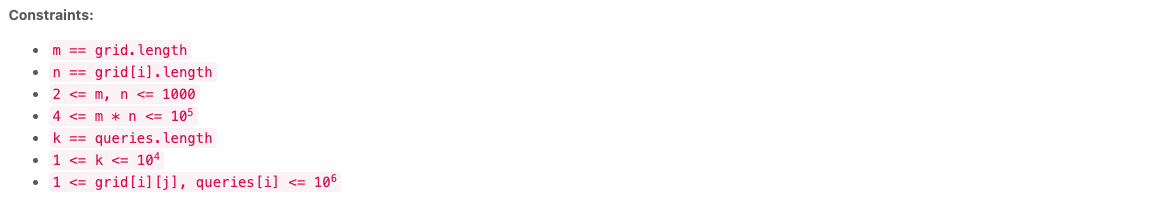

#### 내 풀이 : 시간초과

In [ ]:
from collections import deque

class Solution:
    def maxPoints(self, grid: List[List[int]], queries: List[int]) -> List[int]:
        def bfs(grid, query):
            r = len(grid)
            c = len(grid[0])
            visited = [[0] * c for _ in range(r)]
            dx = [-1,0,1,0]
            dy = [0,1,0,-1]
            q = deque()
            if query <= grid[0][0]:
                return 0
            else:
                q.append((0,0))
                while q:
                    x,y = q.popleft()
                    visited[x][y] = 1
                    for i in range(4):
                        nx = x + dx[i]
                        ny = y + dy[i]
                        if 0<=nx<r and 0<=ny<c and (visited[nx][ny] == 0):
                            if query > grid[nx][ny]:
                                q.append((nx,ny))
                    
            return sum(list(map(sum, visited)))
        
        query_dict = {}
        answer = []
        for query in queries:
            if query not in query_dict:
                query_dict[query] = bfs(grid,query)
                answer.append(query_dict[query])
            else:
                answer.append(query_dict[query])
            
        return answer

#### solution, heap과 정렬을 이용해서 시간 절약
- queries를 정렬한 후에, (0,0)부터 시작하는 것이 아니라 이미 뚫어놓은 길에서부터 다시 시작하는 방법 ex) 5로 뚫었던 길에서 막힌 부분을 세이브 해두고 다시 6으로 뚫으면서 길을 개척
- 이렇게 하면 총 한 번의 bfs로 모든 부분을 탐색할 수 있기 때문에 시간절약

In [ ]:
class Solution:
    def maxPoints(self, grid, qs: List[int]) -> List[int]:
        queries = sorted(set(qs))
        res = {}
        rows, cols = len(grid), len(grid[0])
        q = [(grid[0][0], 0, 0)] # heap
        prevCount = 0

        for num in queries:
            count = prevCount

            while q:
                val, r, c = q[0]

                if val >= num: break # pop only when the condition satisfy else break
                else:
                    heappop(q)
                    grid[r][c] = None
                    count += 1

                    for i, j in [(r + 1, c), (r, c + 1), (r - 1, c), (r, c - 1)]:
                        if 0 <= i < rows and 0 <= j < cols and grid[i][j] is not None:
                            heappush(q, (grid[i][j], i, j))
                            grid[i][j] = None

            res[num] = prevCount = count

        ans = [res[num] for num in qs]
        return ans